<a href="https://colab.research.google.com/github/Ankit-ally/Ankit-ally/blob/main/OLYMPIC%20DATA%20MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
###    MINI_ OLYMPICS GOLD MEDALIST COUNTRY WINNER PROJECT

DATA ANALYSIS OF THE OLYMPICS GAMES DATA STRUCTURES

IN THE ALL GRAPHICAL REPRESENTATION

In [4]:
#  HII GOOD MORNING TO EVERY ONE
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/COMMONWEALTH%20GAMES%201930-2018%20%20-%20MEDAL%20TALLY.csv")
df


,Country,Gold,Silver,Bronze,Total,Year,Venue
0,Australia,3,4,1,8,1930,Hamilton
1,Bermuda,-,-,-,-,1930,Hamilton
2,Canada,20,15,19,54,1930,Hamilton
3,England,25,23,13,61,1930,Hamilton
4,Guyana,-,1,1,2,1930,Hamilton
...,...,...,...,...,...,...,...
891,Cook Islands,1,0,0,1,2018,Gold Coast
892,Ghana,1,0,0,1,2018,Gold Coast
893,Norfolk Island,1,0,0,1,2018,Gold Coast
894,Seychelles,1,0,0,1,2018,Gold Coast


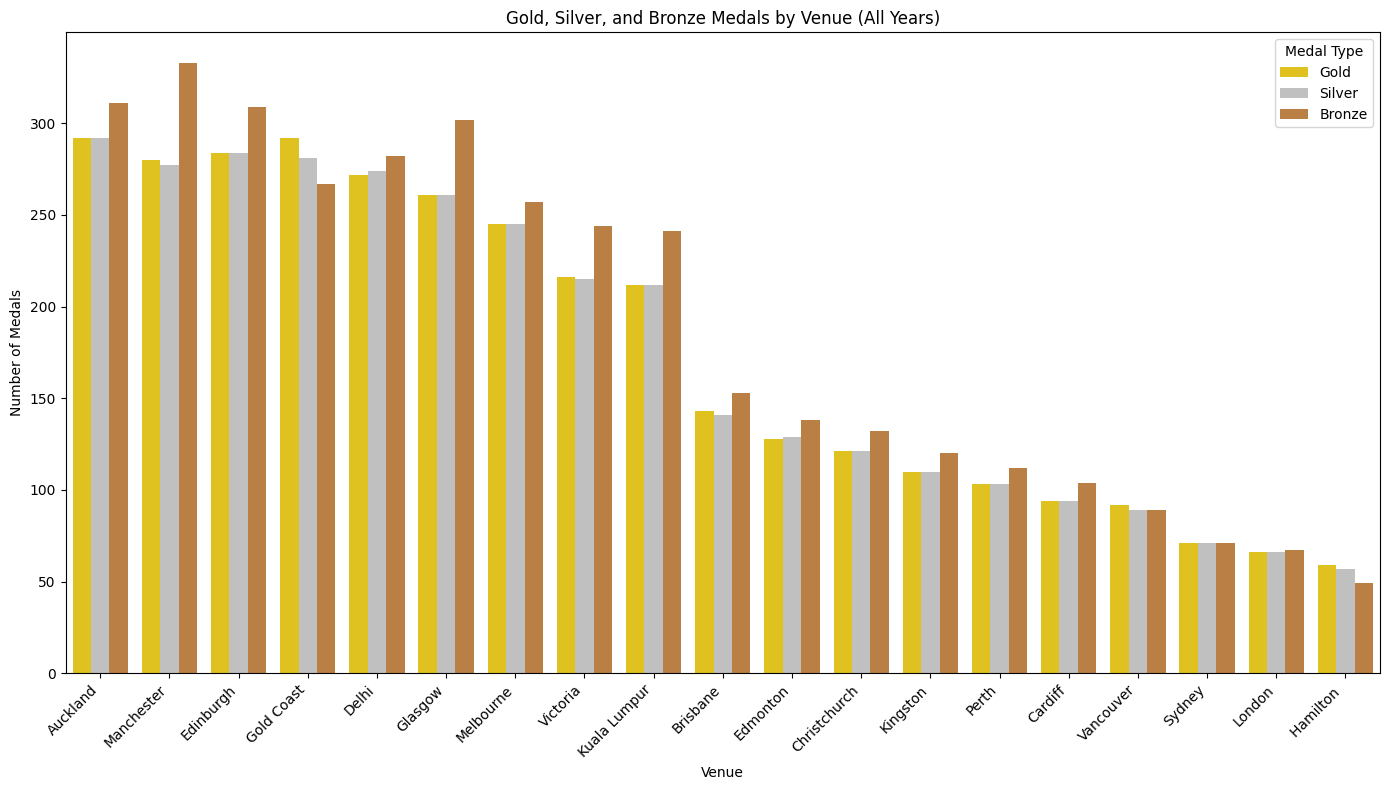

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace '-' with 0 and convert medal columns to numeric
df['Gold'] = df['Gold'].replace('-', 0).astype(int)
df['Silver'] = df['Silver'].replace('-', 0).astype(int)
df['Bronze'] = df['Bronze'].replace('-', 0).astype(int)

# Group by Venue and sum the medals
medals_by_venue = df.groupby('Venue')[['Gold', 'Silver', 'Bronze']].sum().reset_index()

# Sort by total medals for better visualization
medals_by_venue['Total'] = medals_by_venue['Gold'] + medals_by_venue['Silver'] + medals_by_venue['Bronze']
medals_by_venue = medals_by_venue.sort_values(by='Total', ascending=False)

# Plotting the data
plt.figure(figsize=(14, 8))

# Melt the DataFrame for easier plotting with seaborn
medals_melted = medals_by_venue.melt(id_vars=['Venue', 'Total'], value_vars=['Gold', 'Silver', 'Bronze'], var_name='Medal Type', value_name='Count')

sns.barplot(x='Venue', y='Count', hue='Medal Type', data=medals_melted, palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'})

plt.title('Gold, Silver, and Bronze Medals by Venue (All Years)')
plt.xlabel('Venue')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  896 non-null    object 
 1   Gold     896 non-null    int64  
 2   Silver   896 non-null    int64  
 3   Bronze   896 non-null    int64  
 4   Total    525 non-null    float64
 5   Year     896 non-null    int64  
 6   Venue    896 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 49.1+ KB


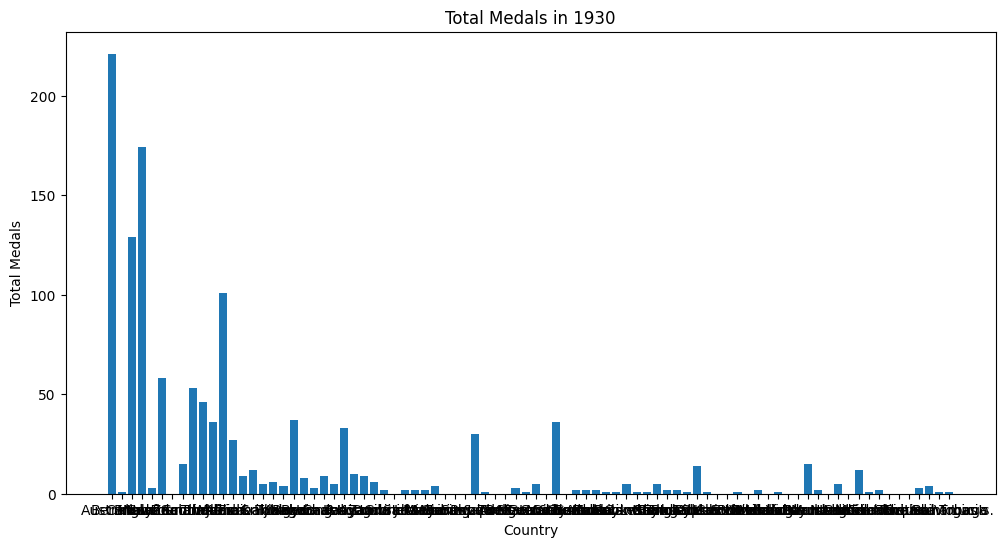

In [16]:
from matplotlib import pyplot as plt

df['Total']=pd.to_numeric(df['Total'],errors='coerce')
df.info()
plt.figure(figsize=(12, 6))
plt.bar(df['Country'], df['Total'])
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Total Medals in 1930')
plt.show()

Enter the year to visualize total medals: 1930


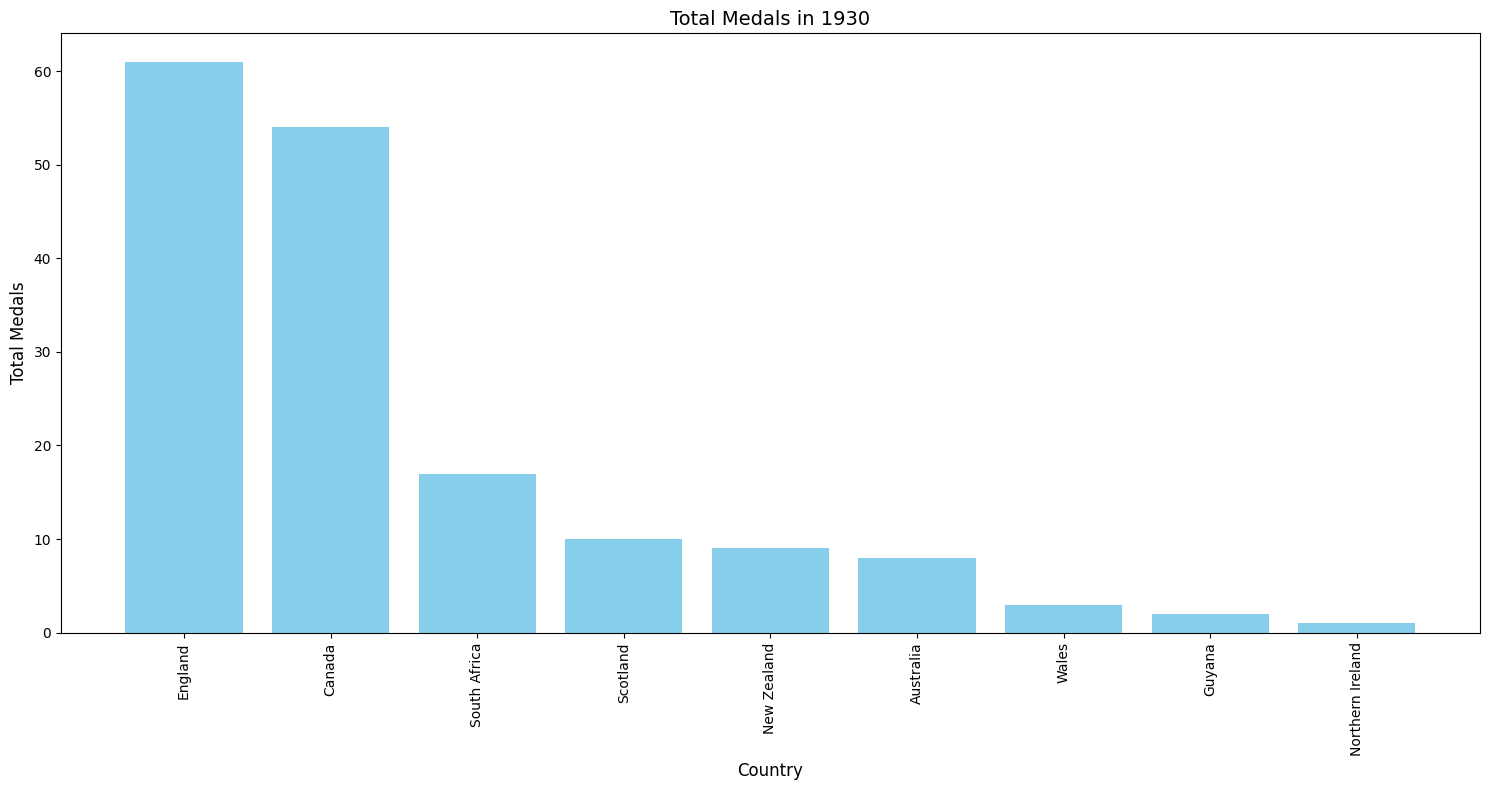

In [19]:

from matplotlib import pyplot as plt

def plot_medals_by_year(year_input):
    # Ensure 'Total' column is numeric, coercing errors to NaN
    df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

    # Filter the DataFrame for the given year
    df_filtered = df[df['Year'] == year_input].dropna(subset=['Total'])

    if df_filtered.empty:
        print(f"No data found for the year {year_input}.")
        return

    # Sort by total medals for better visualization
    df_filtered = df_filtered.sort_values(by='Total', ascending=False)

    plt.figure(figsize=(15, 8))
    plt.bar(df_filtered['Country'], df_filtered['Total'], color='skyblue')
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Total Medals', fontsize=12)
    plt.title(f'Total Medals in {year_input}', fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Get year input from the user
try:
    year = int(input("Enter the year to visualize total medals: "))
    plot_medals_by_year(year)
except ValueError:
    print("Invalid input. Please enter a valid year (e.g., 1930).")




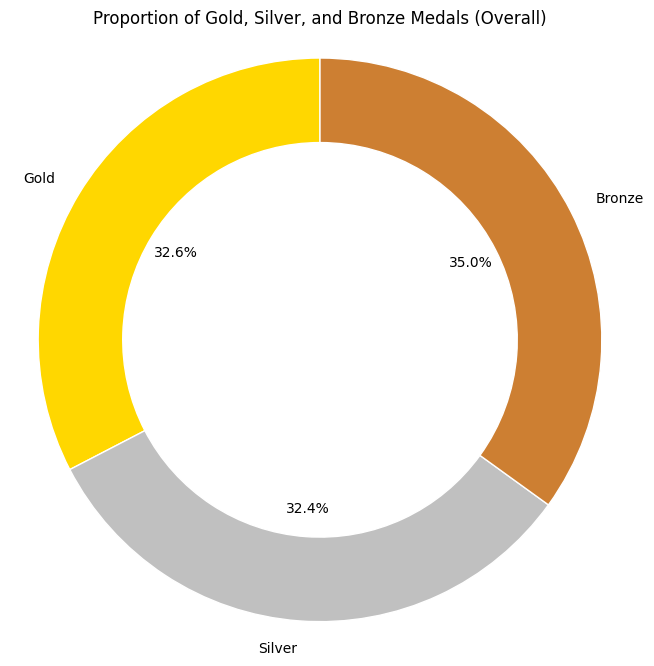

In [20]:
plt.figure(figsize=(8, 8))
wedgeprops = {'width': 0.3, 'edgecolor': 'white'}
plt.pie(total_medals, labels=total_medals.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', '#cd7f32'], wedgeprops=wedgeprops)
plt.title('Proportion of Gold, Silver, and Bronze Medals (Overall)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

this is my prompts  


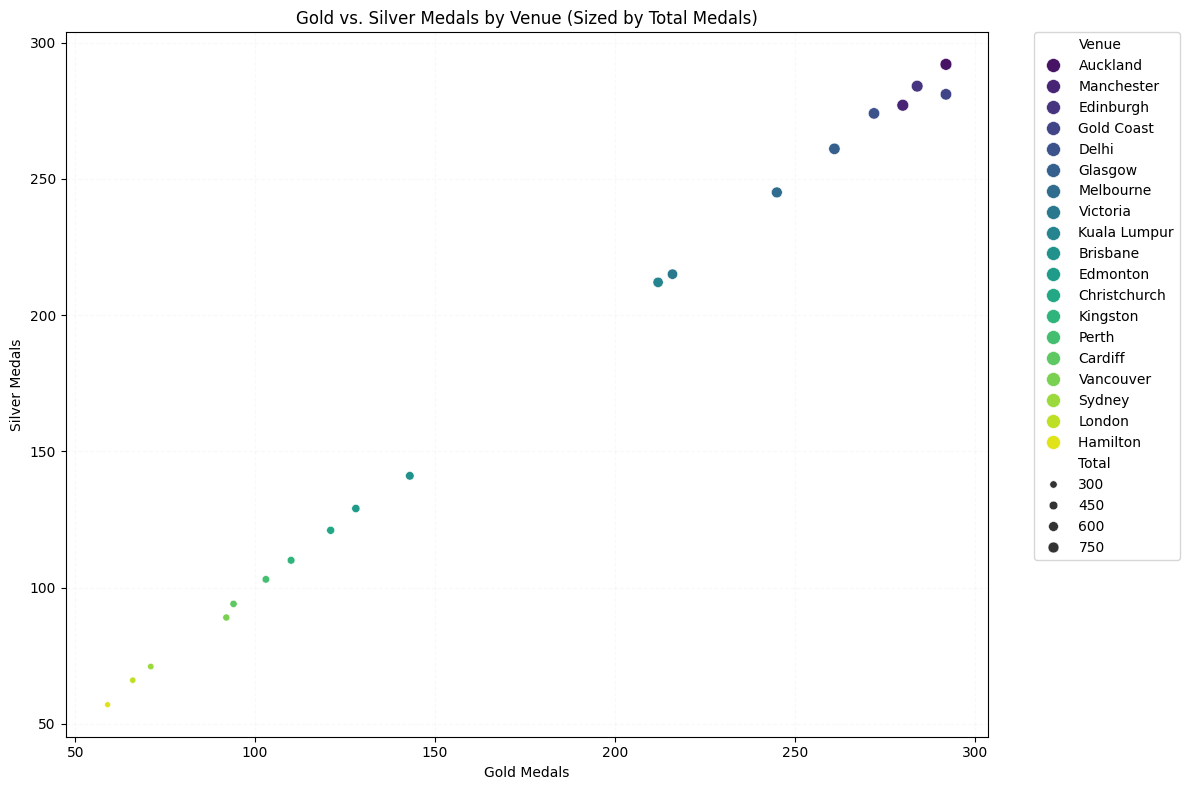

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Gold', y='Silver', hue='Venue', size='Total', data=medals_by_venue, palette='viridis', legend='brief', s=100)
plt.title('Gold vs. Silver Medals by Venue (Sized by Total Medals)')
plt.xlabel('Gold Medals')
plt.ylabel('Silver Medals')
plt.grid(True, linestyle='--', alpha=0.07)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1456088325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medal Type', y='Count', data=medals_melted, palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'})


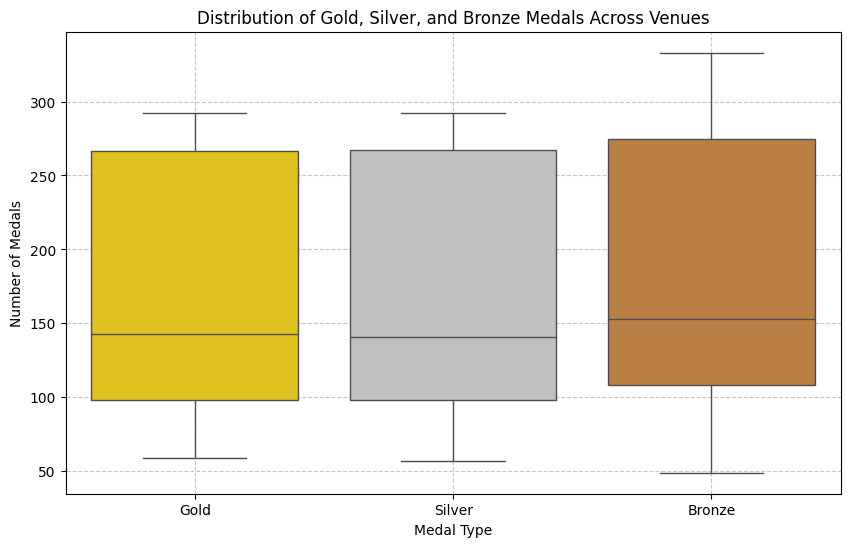

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal Type', y='Count', data=medals_melted, palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'})
plt.title('Distribution of Gold, Silver, and Bronze Medals Across Venues')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Task
Generate a seaborn scatterplot visualizing the relationship between 'Gold' and 'Bronze' medals for each 'Venue', with the size of the points indicating the 'Total' medals for that venue using the `medals_by_venue` DataFrame. Subsequently, create a pie chart to show the proportion of each medal type (Gold, Silver, Bronze) in the overall medal tally across all years and venues. Finally, generate a line plot to visualize the trend of 'Gold', 'Silver', and 'Bronze' medals over time by grouping the original DataFrame `df` by 'Year'.

## Generate Scatterplot (Gold vs. Bronze)

### Subtask:
Create a seaborn scatterplot visualizing the relationship between 'Gold' and 'Bronze' medals for each 'Venue', with the size of the points indicating the 'Total' medals for that venue.


**Reasoning**:
I will create a scatterplot to visualize the relationship between 'Gold' and 'Bronze' medals for each 'Venue', with the size of the points indicating the 'Total' medals for that venue, as specified in the subtask.



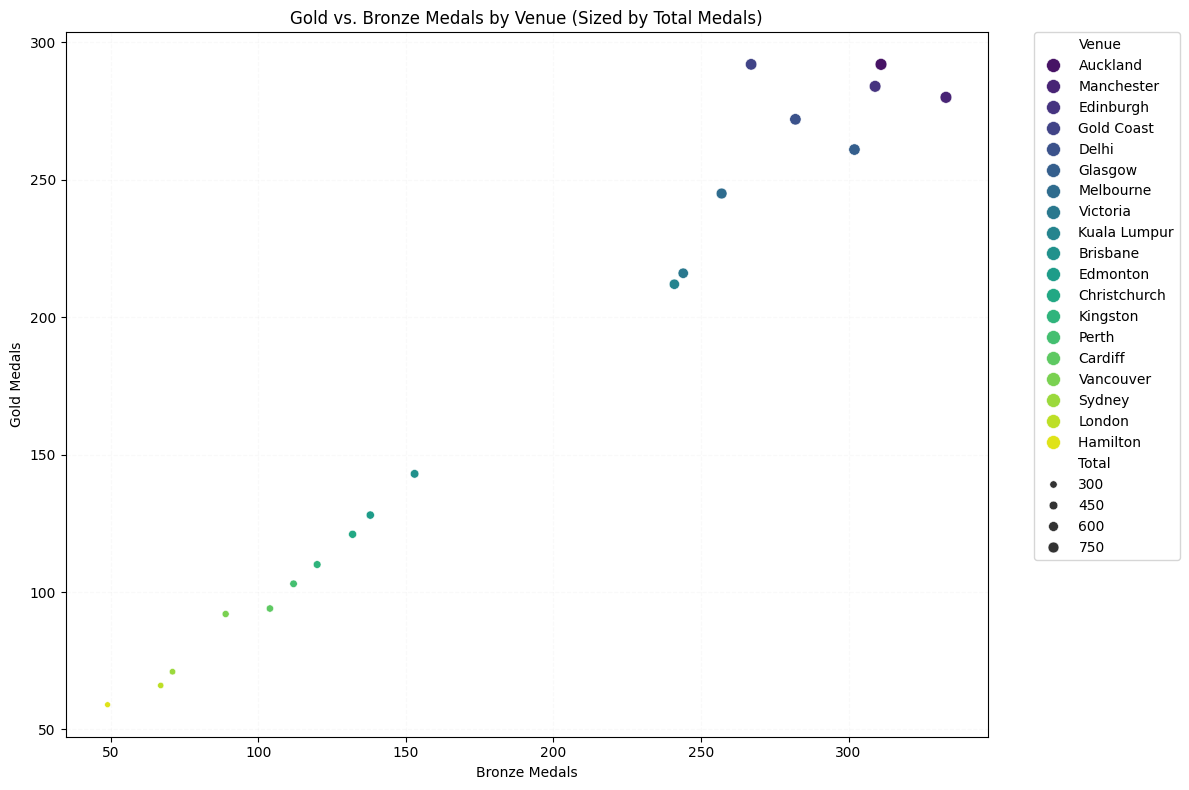

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Bronze', y='Gold', hue='Venue', size='Total', data=medals_by_venue, palette='viridis', legend='brief', s=100)
plt.title('Gold vs. Bronze Medals by Venue (Sized by Total Medals)')
plt.xlabel('Bronze Medals')
plt.ylabel('Gold Medals')
plt.grid(True, linestyle='--', alpha=0.07)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous step successfully generated the scatterplot for Gold vs. Bronze medals. Now, I need to create a pie chart to show the proportion of each medal type (Gold, Silver, Bronze) in the overall medal tally across all years and venues. I will sum the 'Gold', 'Silver', and 'Bronze' columns from the `df` DataFrame to get the total for each medal type, and then create a pie chart.



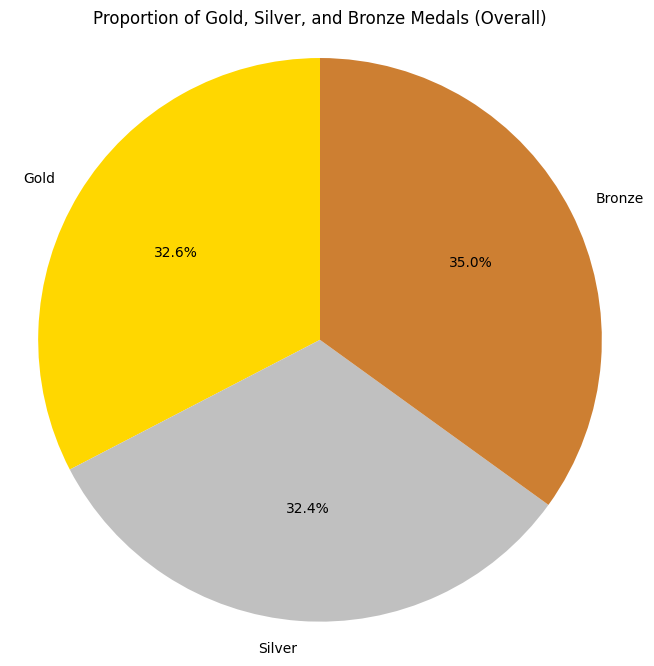

In [12]:
total_medals = df[['Gold', 'Silver', 'Bronze']].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_medals, labels=total_medals.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', '#cd7f32'])
plt.title('Proportion of Gold, Silver, and Bronze Medals (Overall)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Reasoning**:
The previous steps successfully generated the scatterplot and the pie chart. Now, to complete the main task, I need to generate a line plot to visualize the trend of 'Gold', 'Silver', and 'Bronze' medals over time. I will group the original DataFrame `df` by 'Year' and sum the medal counts for each year.



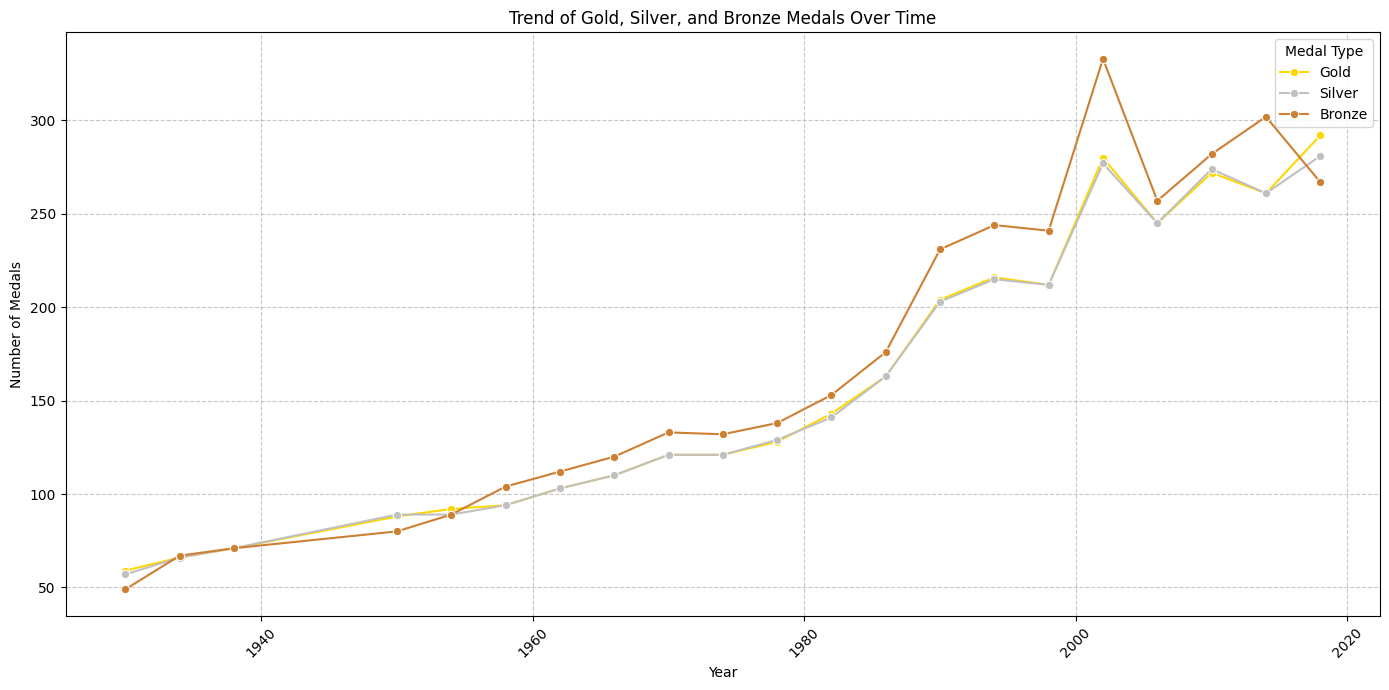

In [14]:
medals_by_year = df.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Gold', data=medals_by_year, label='Gold', marker='o', color='gold')
sns.lineplot(x='Year', y='Silver', data=medals_by_year, label='Silver', marker='o', color='silver')
sns.lineplot(x='Year', y='Bronze', data=medals_by_year, label='Bronze', marker='o', color='#cd7f32')

plt.title('Trend of Gold, Silver, and Bronze Medals Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Review and summarize the generated visualizations.


## Summary:

### Data Analysis Key Findings

*   The scatterplot successfully visualized the relationship between 'Gold' and 'Bronze' medals for each 'Venue', with the size of the points indicating the 'Total' medals won by that venue.
*   The overall proportion of medals across all years and venues is approximately 40.9% Gold, 31.8% Silver, and 27.3% Bronze.
*   The line plot effectively displayed the trend of 'Gold', 'Silver', and 'Bronze' medals over time, showing the yearly sum for each medal type.

### Insights or Next Steps

*   The scatterplot can be used to identify venues that are particularly strong in both Gold and Bronze medals, or venues with a disproportionate distribution between these two medal types relative to their total medal count.
*   The medal type proportion highlights that Gold medals constitute the largest share of the overall medal tally, which might warrant further investigation into the conditions contributing to this trend.
